# Cliffwalk gridworld with SARSA and Q-learning

In [1]:
import agents
import gridworld

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numba import njit
from itertools import product

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
n_rows = 4
n_cols = 12

In [5]:
movements = np.array([
    [0, 1], # right
    [0, -1], # left
    [1, 0], # down,
    [-1, 0], # up
    [0, 0], # nothing
])
n_actions = len(movements)

name_movements = ["right", "left", "down", "up"]
name_movements = ["right", "left", "down", "up", "nothing"]

In [36]:
start_ix = 36
end_ix = 47
reward_goal =  100
G = gridworld.CliffGridworld(start_ix, end_ix, n_rows, n_cols, reward_goal)

In [45]:
n_steps = 5000
epsilon = 0.1
alpha, gamma = 0.5, 1.0

hist_sarsa, Q_sarsa = agents.run_agent_sarsa(
    start_ix, G, n_actions, n_steps, epsilon, alpha, gamma, movements
)

hist_qlearn, Q_qlearn = agents.run_agent_qlearning(
    start_ix, G, n_actions, n_steps, epsilon, alpha, gamma, movements
)

In [46]:
hist_sarsa["reward"][-500:].mean()

1.428

In [47]:
hist_qlearn["reward"][-500:].mean()

2.276

In [48]:
ix_goal = np.where(hist_sarsa["reward"] == reward_goal)[0]
pos_hist = np.c_[hist_sarsa["ix"] % n_cols, hist_sarsa["ix"] // n_cols]
distance_hist = np.abs(pos_hist - G.get_pos(end_ix)).sum(axis=1)
len(ix_goal)

133

In [42]:
markers = {
    "down": "v",
    "up": "^",
    "right": ">",
    "left": "<",
    "nothing": "o"
}

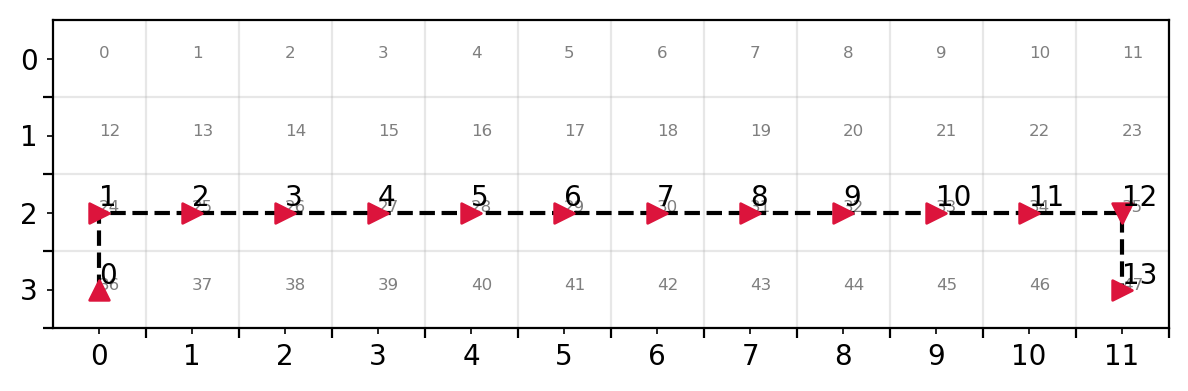

In [43]:
run = -5
iinit = ix_goal[run] + 1
iend = ix_goal[run + 1] + 1

subhist_action = hist_sarsa["action"][iinit:iend]
subhist_action = [name_movements[a] for a in subhist_action]
subhist_action = [markers[action] for action in subhist_action]

subhist_pos = pos_hist[iinit:iend]

fig, ax = plt.subplots(figsize=(n_cols * 0.6, n_rows * 0.5))
plt.plot(*subhist_pos.T, c="black", linestyle="--")

i = 0
for (x,y), m in zip(subhist_pos, subhist_action):
    plt.scatter(x, y, marker=m, zorder=3, s=50, c="crimson")
    plt.text(x, y, i, verticalalignment="bottom", horizontalalignment="left")
    i += 1

xticks = np.arange(n_cols)
yticks = np.arange(n_rows)
ax.set(
    xticks=xticks + 0.5,
    yticks=yticks + 0.5,
    xticklabels="",
    yticklabels="",
)
ax.set_xticks(xticks, labels=xticks, minor=True)
ax.set_yticks(yticks, labels=yticks, minor=True)

ax.set_ylim(-0.5, n_rows - 0.5)
ax.set_xlim(-0.5, n_cols - 0.5)
ax.invert_yaxis()


for i, (r, c) in enumerate(product(range(G.n_rows), range(G.n_cols))):
    plt.text(c, r, i, c="tab:gray", zorder=0, fontsize=6)

plt.grid(alpha=0.3)
# plt.savefig("windy-gridworld.png", bbox_inches="tight", dpi=150)

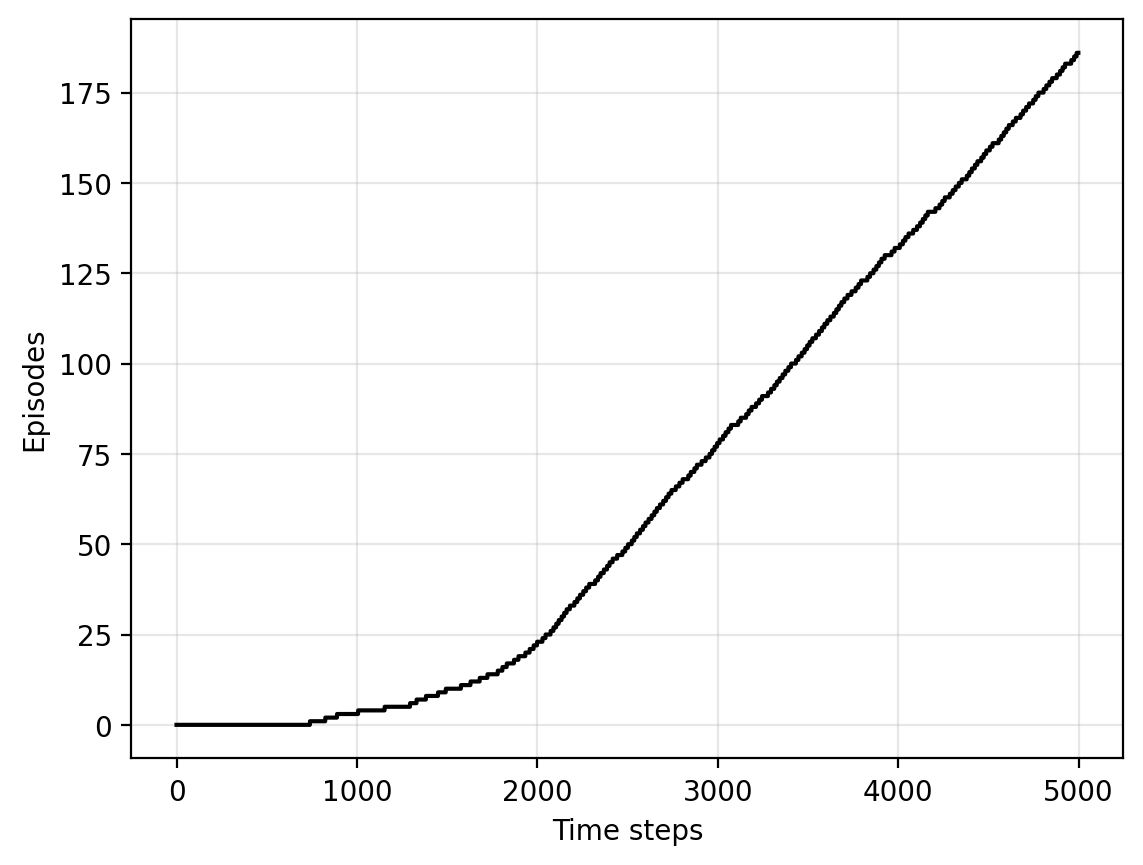

In [44]:
plt.plot((hist_sarsa["reward"] == reward_goal).cumsum(), c="black")
plt.grid(alpha=0.3)
plt.xlabel("Time steps")
plt.ylabel("Episodes");